In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

from tqdm import tqdm

gold_yellow = "#FFC000"

plt.style.use("dark_background")

In [2]:
df = gpd.read_file("../data/master.geojson")

In [3]:
df.head()

,codgeo,dep,reg,xcl2154,ycl2154,libgeo,net_salary,population,distance_to_angers,distance_to_avignon,...,distance_to_rennes,distance_to_rouen,distance_to_saintbrieuc,distance_to_saintetienne,distance_to_strasbourg,distance_to_toulouse,distance_to_tours,dist_min,closest_metropolis,geometry
0,01004,01,84,882724.0,6542583.0,Ambérieu-en-Bugey,13.7,13460.0,481.386634,227.390682,...,585.373385,501.891964,676.571427,95.057840,342.181840,405.256373,390.767916,45.879279,Lyon,"POLYGON ((5.38637 45.93121, 5.38892 45.93320, ..."
1,01007,01,84,882682.0,6548067.0,Ambronay,13.5,2563.0,479.423210,232.793303,...,583.044624,497.657430,674.146914,98.542071,337.432535,408.804303,388.531487,48.741451,Lyon,"POLYGON ((5.40440 46.00778, 5.39779 46.01009, ..."
2,01014,01,84,906407.0,6580780.0,Arbent,13.5,3281.0,491.910607,269.530737,...,592.430505,489.484950,682.573590,138.224859,297.286527,448.270671,399.360905,87.894148,Lyon,"POLYGON ((5.71332 46.25667, 5.71983 46.25783, ..."
3,01024,01,84,866161.0,6578890.0,Attignat,12.9,3329.0,453.855171,261.397017,...,555.654896,463.493880,646.263640,111.697209,320.269383,417.976502,361.838430,63.123904,Lyon,"POLYGON ((5.16256 46.25622, 5.16464 46.25629, ..."
4,01025,01,84,849782.0,6581485.0,Bâgé-la-Ville,13.0,3142.0,437.452133,263.172045,...,539.526669,450.918833,630.241338,106.570254,327.904742,408.624114,345.563023,61.578670,Lyon,"POLYGON ((4.92091 46.30781, 4.92544 46.31070, ..."


In [4]:
city = "Paris"

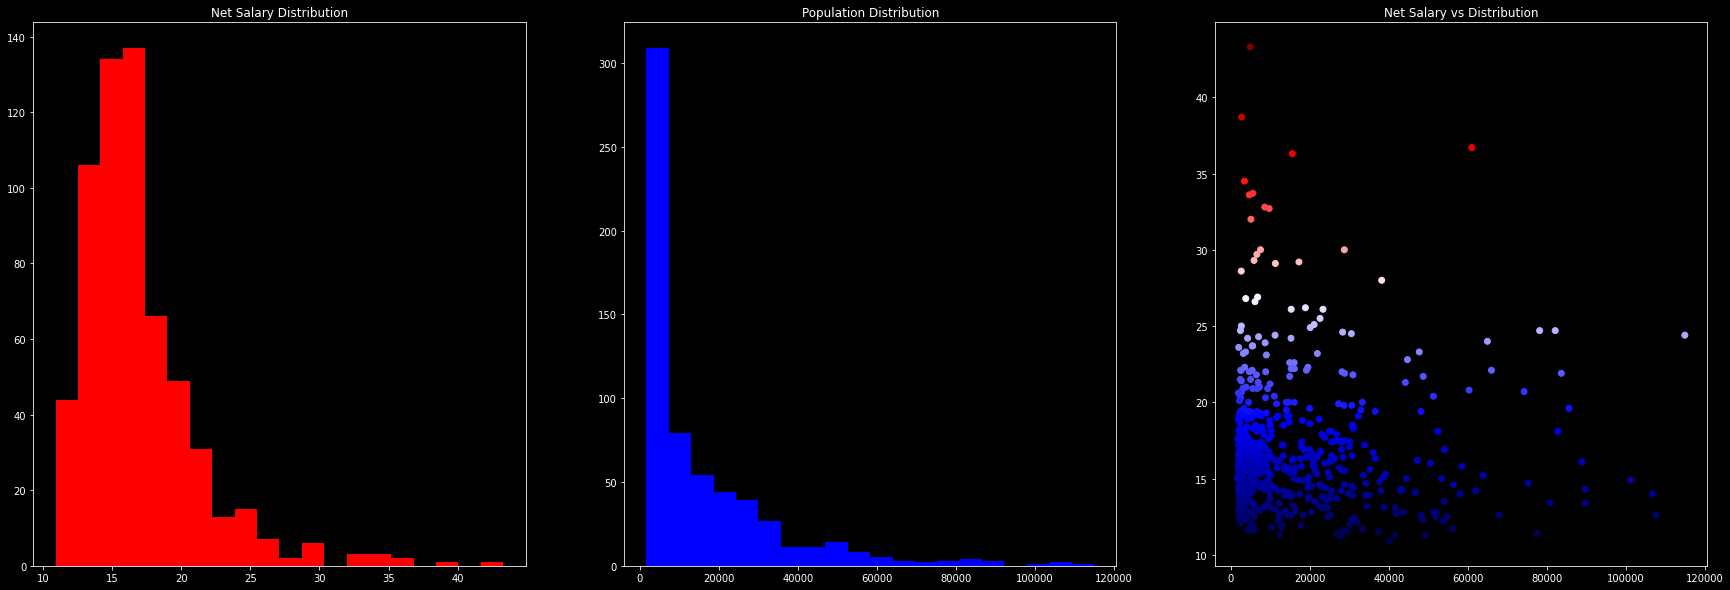

In [5]:
df_temp = df[df["closest_metropolis"] == city]
df_temp = df_temp[df_temp["libgeo"] != city]
# df_temp = df_temp[df_temp["population"] < 20000]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))

axes[0].hist(
    df_temp["net_salary"],
    bins=20,
    color="red"
)

axes[0].set_title("Net Salary Distribution")

axes[1].hist(
    df_temp["population"],
    bins=20,
    color="b"
)
axes[1].set_title("Population Distribution")

axes[2].scatter(
    df_temp["population"],
    df_temp["net_salary"],
    cmap="seismic",
    c=df_temp["net_salary"]
)
axes[2].set_title("Net Salary vs Distribution")

plt.show()

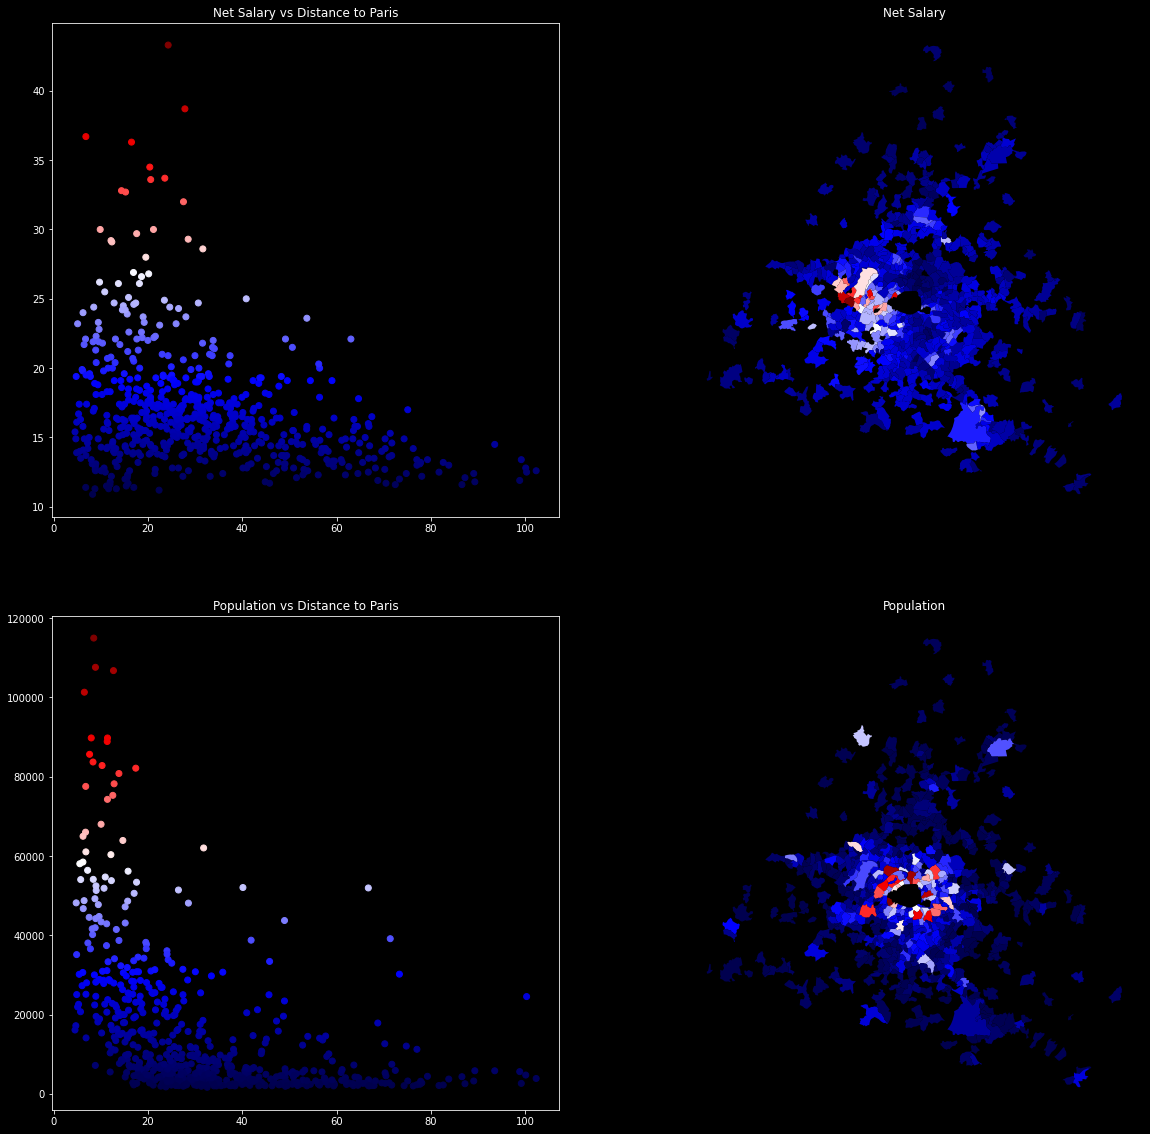

In [6]:
df_temp = df.copy()[df["closest_metropolis"] == city]
df_temp = df_temp[df_temp["libgeo"] != city]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))

axes[0, 0].scatter(
    df_temp["dist_min"],
    df_temp["net_salary"],
    c=df_temp["net_salary"],
    cmap="seismic"
)

axes[0, 0].set_title(f"Net Salary vs Distance to {city}")


axes[1, 0].scatter(
    df_temp["dist_min"],
    df_temp["population"],
    c=df_temp["population"],
    cmap="seismic",
)

axes[1, 0].set_title(f"Population vs Distance to {city}")


df_temp.plot(
    df_temp["net_salary"],
    ax=axes[0, 1],
    cmap="seismic"
)

axes[0, 1].axis("off")
axes[0, 1].set_title("Net Salary")

df_temp.plot(
    df_temp["population"],
    ax=axes[1, 1],
    cmap="seismic"
)

axes[1, 1].axis("off")
axes[1, 1].set_title("Population")

plt.show()


In [7]:
df_temp.shape

(620, 45)

In [8]:
# def paris_separation(x, y, 
x_paris=652492.0
y_paris=6862009.0
                    # ):
    
x = df_temp["xcl2154"]
y = df_temp["ycl2154"]
x_delta = x - x_paris
y_delta = y - y_paris

angle = np.arctan2(y_delta, x_delta)
areas = np.array(["Paris"] * len(x))


areas[(angle < -np.pi * 3 / 4) | (angle > np.pi * 3/4)] = "West"
areas[(angle > np.pi / 4) & (angle < np.pi * 3/4)] = "East"
    

df_temp["closest_metropolis"] = areas

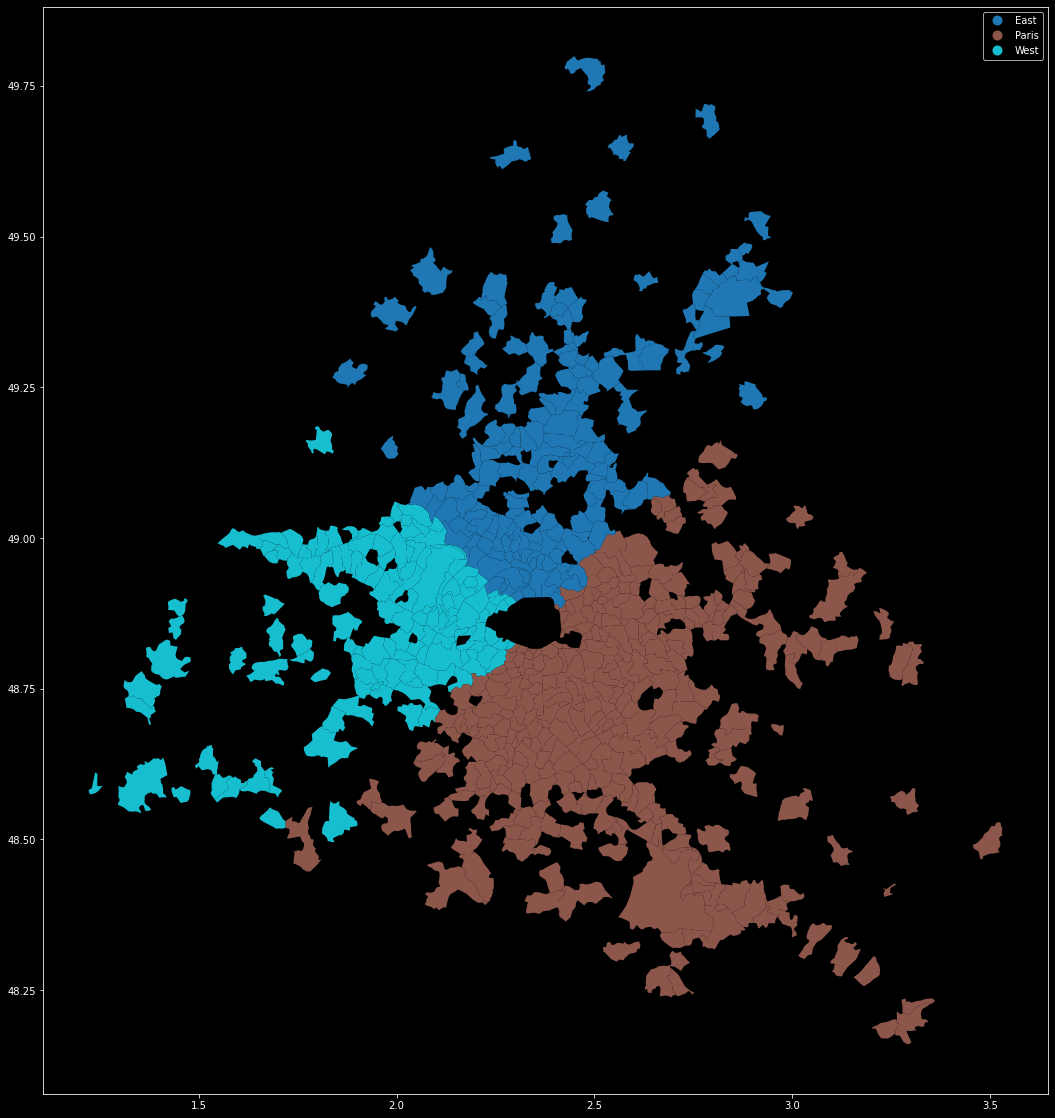

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(20, 20))

df_temp.plot(
    df_temp["closest_metropolis"],
    legend=True,
    ax=ax
)

plt.show()

['Paris', 'West', 'East']


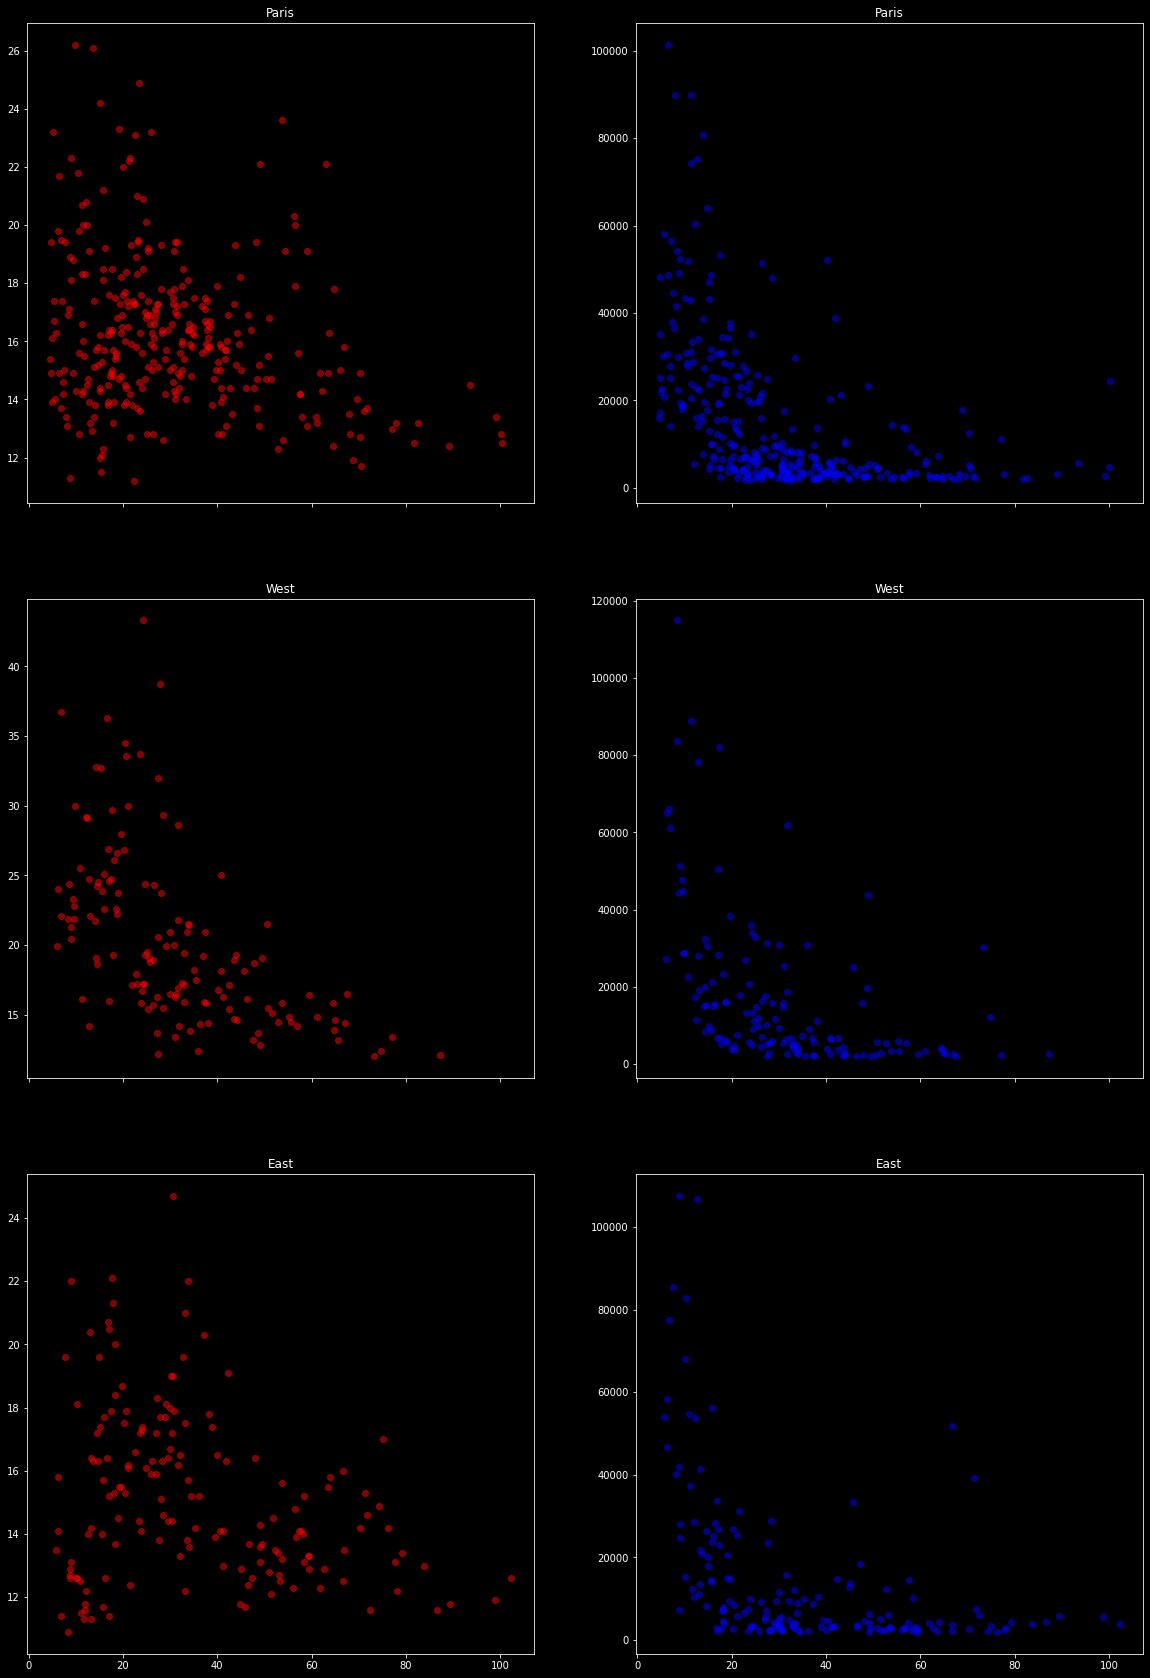

In [10]:
cities = ["Paris", "West", "East"]
print(cities)

fig, axes = plt.subplots(
    ncols=2,
    nrows=3,
    figsize=(20, 30),
    sharex=True
)

for i, city in enumerate(cities):
    ax = axes[i, 0]
    df_temp2 = df_temp[df_temp["closest_metropolis"] == city]
    ax.scatter(
        df_temp2["dist_min"],
        df_temp2["net_salary"], # / df_temp["net_salary"].max(),
        color="red",
        alpha=.5
    )
    ax.set_title(city)
    
    ax = axes[i, 1]
    ax.scatter(
        df_temp2["dist_min"],
        df_temp2["population"], # / df_temp["net_salary"].max(),
        color="b",
        alpha=.5
    )
    ax.set_title(city)